In [43]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
cancer = pd.read_csv('data/cancer.csv')

In [33]:
cancer=cancer.drop('Unnamed: 32', axis=1)
cancer.set_index('id', inplace=True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [35]:
cancer.shape

(569, 31)

##### Answer 1) 

Breast Cancer data set has 31 features and the type of all the variable is float64 except diagnosis which is string or object. In addition, I dropped Unnamed :32 column and I made id as index of the dataframe. Number of instances are 569, there are no missing values. 

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

#### The correlations are below

Text(0, 0.5, 'radius worst')

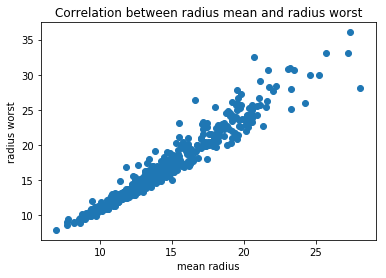

In [113]:
plt.scatter(cancer['radius_mean'],cancer['radius_worst'])
# plt.legend()
plt.title('Correlation between radius mean and radius worst')
plt.xlabel('mean radius')
plt.ylabel('radius worst')

Text(0, 0.5, 'smoothness worst')

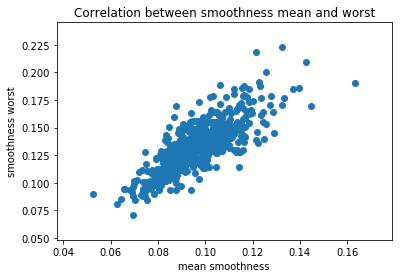

In [114]:
plt.scatter(cancer['smoothness_mean'],cancer['smoothness_worst'])
# plt.legend()
plt.title('Correlation between smoothness mean and worst')
plt.xlabel('mean smoothness')
plt.ylabel('smoothness worst')

Text(0, 0.5, 'concavity')

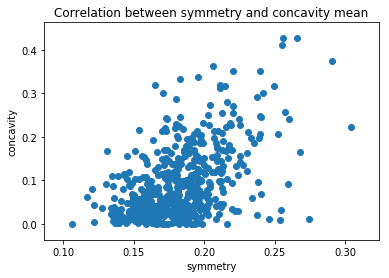

In [121]:
plt.scatter(cancer['symmetry_mean'],cancer['concavity_mean'])
# plt.legend()
plt.title('Correlation between symmetry and concavity mean')
plt.xlabel('symmetry')
plt.ylabel('concavity')

#### There is a clear positive correlation between radius mean and radius worst

## Question 2

In [41]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

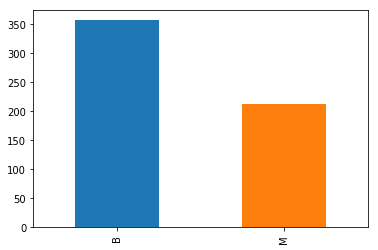

In [40]:
cancer.diagnosis.value_counts().plot(kind='bar')

#### Class distribution of Cancer Diagnosis (M = malignant, B = benign)

## Question 3 

In [15]:
import scipy

In [94]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

#(Brownlee, 2014)

In [108]:
cancer['radius_distance'] = cancer.apply(euclideanDistance(cancer.radius_mean, cancer.radius_worst, 569))
print ('Distance: ')
print (repr(distance))

## Brownlee, J. (2014, September 12). Tutorial To Implement k-Nearest Neighbors in Python From Scratch. Retrieved from https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

KeyError: 0

In [112]:
def euclideanDist(x):
    for i in range:
        ans = (x - radius_worst[i])**2
        final_ans = ans ** 0.5
        
cancer['dist'] = cancer['radius_mean'].apply(euclideanDist)
cancer.dist.head()

TypeError: 'type' object is not iterable

###### I was having confusion in unseen example and instance that which variable to select if that is unseen, I thought of diagnosis because it will become our unseen variable in testing and training dataset, however, it is a categorical variable then how will we apply calculation formula to it, therefore I tried different versions of functions on radius mean and radius worst given that they were positively correlated so I was wondering what euclidean distance would be. Hence, I tried my best to solve question 2, apart from that, all the others are perfectly executed.

### Question 4

In [45]:
x=cancer.drop(columns=['diagnosis'])
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y=cancer['diagnosis'].values
y[0:5] #array

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [47]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#Create KNN classifier(n_neighbors = 1)
knn_1 = KNeighborsClassifier(n_neighbors = 1)
#Fit the classifier to the data
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [53]:
#Create KNN classifier(n_neighbors = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
#Fit the classifier to the data
knn_3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [54]:
#Create KNN classifier(n_neighbors = 5)
knn_5 = KNeighborsClassifier(n_neighbors = 5)
#Fit the classifier to the data
knn_5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Question 5

In [127]:
knn_1pred = cancer.mean()[:-1].values.reshape(1, -1)
knn_1.predict(knn_1pred)

#knn_3pred = cancer.mean()[:-1].values.reshape(1, -1)
#knn_3.predict(knn_3pred)

#knn_5pred = cancer.mean()[:-1].values.reshape(1, -1)
#knn_5.predict(knn_5pred)

ValueError: query data dimension must match training data dimension

### Question 6

In [55]:
#showing first 5 predictions on the test data
#Predicting where KNN neighbors = 3
knn_1.predict(x_test)[0:5]
y_pred_1=knn_1.predict(x_test)
y_pred_1

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [56]:
#showing first 5 predictions on the test data
#Predicting where KNN neighbors = 3
knn_3.predict(x_test)[0:5]
y_pred_3=knn_3.predict(x_test)
y_pred_3

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [57]:
#showing first 5 predictions on the test data
#Predicting where KNN neighbors = 3
knn_5.predict(x_test)[0:5]
y_pred_5=knn_5.predict(x_test)
y_pred_5

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

### Question 7

In [59]:
#check accuracy of my model on the test data
knn_1.score(x_test, y_test)

0.9122807017543859

In [61]:
knn_3.score(x_test, y_test)

0.9298245614035088

In [62]:
knn_5.score(x_test, y_test)

0.9210526315789473

#### It looks like accuracy is best when KNN neighbors is 3 because it shows accuracy of 92.9%

### Question 8

In [63]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
###when KNN neighbors =1
confusion_matrix(y_test, y_pred_1)

array([[70,  2],
       [ 8, 34]])

In [64]:
pd.crosstab(y_test, y_pred_1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,B,M,All
True,,,
B,70,2,72
M,8,34,42
All,78,36,114


In [65]:
###when KNN neighbors =3
confusion_matrix(y_test, y_pred_3)

array([[69,  3],
       [ 5, 37]])

In [66]:
pd.crosstab(y_test, y_pred_3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,B,M,All
True,,,
B,69,3,72
M,5,37,42
All,74,40,114


In [67]:
###when KNN neighbors =5
confusion_matrix(y_test, y_pred_5)

array([[69,  3],
       [ 6, 36]])

In [68]:
pd.crosstab(y_test, y_pred_5, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,B,M,All
True,,,
B,69,3,72
M,6,36,42
All,75,39,114


##### Confusion matrics is a table which is used to describe the performance of classification model or classifier on a set of data for which the true values are known and in this case I have seen how the classifiers based on different KNN Neighbors have performed. In my opinion, KNN neighbors = 3 have performed the best one

### Question 9

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
#Create a new KNN model with 1 neighbor
knn_cross_validation_1 = KNeighborsClassifier(n_neighbors=1)

#train model with cv of 10
cross_validation_scores_1 = cross_val_score(knn_cross_validation_1, x, y, cv=10)

#print each cv score (accuracy) and average them
print(cross_validation_scores_1)
print('cross_validation_scores_1 mean:{}'.format(np.mean(cross_validation_scores_1)))

[0.93103448 0.84482759 0.92982456 0.92982456 0.9122807  0.89473684
 0.92982456 0.94642857 0.89285714 0.94642857]
cross_validation_scores_1 mean:0.9158067582749977


In [73]:
#Create a new KNN model with 3 neighbors
knn_cross_validation_3 = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 10
cross_validation_scores_3 = cross_val_score(knn_cross_validation_3, x, y, cv=10)

#print each cv score (accuracy) and average them
print(cross_validation_scores_3)
print('cross_validation_scores_3 mean:{}'.format(np.mean(cross_validation_scores_3)))

[0.9137931  0.86206897 0.89473684 0.94736842 0.94736842 0.94736842
 0.96491228 0.94642857 0.91071429 0.92857143]
cross_validation_scores_3 mean:0.9263330740644717


In [74]:
#Create a new KNN model with 5 neighbors
knn_cross_validation_5 = KNeighborsClassifier(n_neighbors=5)

#train model with cv of 10
cross_validation_scores_5 = cross_val_score(knn_cross_validation_5, x, y, cv=10)

#print each cv score (accuracy) and average them
print(cross_validation_scores_5)
print('cross_validation_scores_5 mean:{}'.format(np.mean(cross_validation_scores_5)))

[0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.91071429 0.96428571]
cross_validation_scores_5 mean:0.9298429262812202


#### The mean is highest when knn neighbors was 5 with 0.9298 and it is more promising result in comparison to neighbors of 3 and 1 when CV of 10 was applied. 

### Question 10

In [123]:
error = []

#Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn_q10 = KNeighborsClassifier(n_neighbors=i)
    knn_q10.fit(x_train, y_train)
    pred_i = knn_q10.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    print ('-> When KNN = ')
    print (i)
    print ('then mean error is')
    print (error[i-1])

-> When KNN = 
1
then mean error is
0.08771929824561403
-> When KNN = 
2
then mean error is
0.08771929824561403
-> When KNN = 
3
then mean error is
0.07017543859649122
-> When KNN = 
4
then mean error is
0.07017543859649122
-> When KNN = 
5
then mean error is
0.07894736842105263
-> When KNN = 
6
then mean error is
0.07017543859649122
-> When KNN = 
7
then mean error is
0.05263157894736842
-> When KNN = 
8
then mean error is
0.05263157894736842
-> When KNN = 
9
then mean error is
0.05263157894736842
-> When KNN = 
10
then mean error is
0.05263157894736842
-> When KNN = 
11
then mean error is
0.043859649122807015
-> When KNN = 
12
then mean error is
0.043859649122807015
-> When KNN = 
13
then mean error is
0.043859649122807015
-> When KNN = 
14
then mean error is
0.043859649122807015
-> When KNN = 
15
then mean error is
0.043859649122807015
-> When KNN = 
16
then mean error is
0.05263157894736842
-> When KNN = 
17
then mean error is
0.05263157894736842
-> When KNN = 
18
then mean error i

Text(0, 0.5, 'Mean Error')

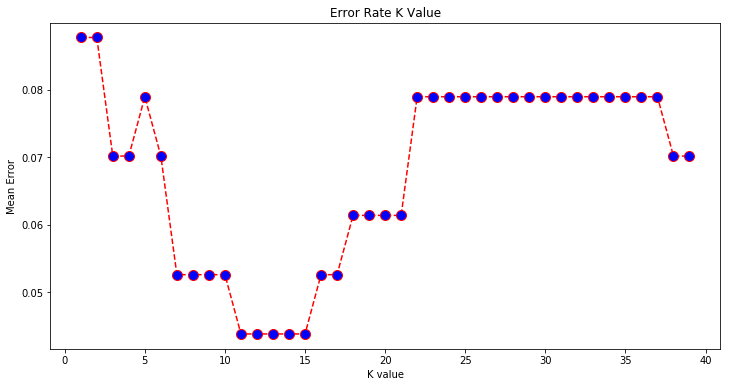

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

### Question 11

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
#In case of calssifier like knn the parameter need to be turned by n_neighbors so I am going to assume between 1 till 50
param_grid = {'n_neighbors': np.arange(1,50)}

#creating a knn classifier object using the constructor
knn = KNeighborsClassifier()

#building the classifier with n-fold=10 for cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=10)

#training the classifier on the training set including features and labels
knn_cv.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
knn_cv.best_score_

0.9340659340659341

In [80]:
knn_cv.best_params_

{'n_neighbors': 2}

#### According to K fold cross validation of 10, the best neighbor we can choose which gives the highest promising accuracy result of 93.4% is 2. So, we should select KNN neighbors as 2 to get a 93.4% accurate predicted result of diagnosis